<p style="font-size:11px;"><em><strong>Créditos</strong>: El contenido de este cuaderno ha sido tomado de varias fuentes, pero especialmente de <a href="https://cordmaur.medium.com/">Mauricio Cordeiro</a> y <a href="https://medium.com/euro-data-cube/harness-the-power-of-sentinel-hub-xcube-eoxhub-geodb-and-more-in-euro-data-cube-31c827a3083b">Dorothy Rono</a>, pero especialmente de los cursos y libros publicados abierta y libremente por <a href="http://darribas.org/">Dani Arribas-Bel</a> - University of Liverpool & <a href="http://spatial.ucr.edu/peopleRey.html">Sergio Rey</a> - Center for Geospatial Sciences, University of California, Riverside. El compilador se disculpa por cualquier omisión involuntaria y estaría encantado de agregar un reconocimiento.</em></p>

# Análisis Geoespacial
La ciencia de datos geoespaciales (GDS, por sus siglas en inglés) es un subconjunto de la ciencia de datos que se enfoca en las características únicas de los datos espaciales, y va más allá de simplemente observar **dónde suceden las cosas para entender por qué suceden allí**. La ciencia de datos geoespaciales se define como la extracción de información significativa de datos que involucran ubicación, proximidad geográfica y/o interacción espacial mediante el uso de técnicas específicamente diseñadas para tratar adecuadamente los datos espaciales (Anselin, 2000).

<img src="http://www.isds.org.za/images/Picture1.jpg" width="400">

Los procesos espaciales consideran dos efectos espaciales importantes en los datos: **heterogeneidad** (no estacionariedad) y **dependencia** (autocorrelación) (Anselin, 1988). La **dependencia espacial** implica que las observaciones en una región están correlacionadas con las de las regiones vecinas (Fletcher, 2018). La dependencia espacial se mide frecuentemente mediante la covarianza y, por lo tanto, es una propiedad de segundo orden - covarianza (Wickham, 2008). Por otro lado, la **heterogeneidad espacial** se refiere a los efectos del espacio sobre las unidades muestrales, en las cuales la media varía de un lugar a otro (Zhang, 2023). Por lo tanto, la heterogeneidad espacial es una propiedad de primer orden - la media (Wang, 2022).

Los datos de entrada utilizados a menudo abarcan tanto heterogeneidad espacial como dependencia espacial (Quevedo, 2022, Lombardo, 2020), lo que viola los supuestos básicos de los modelos de regresión clásicos (Cressie, 2015, Ripley, 1988, Anselin,1988). Esta omisión conduce a la estructura espacial en los residuos de estos modelos (Rey, 2023). Ignorar la heterogeneidad puede tener consecuencias significativas para la validez estadística de las estimaciones del modelo, incluyendo estimaciones de parámetros sesgadas, niveles de significancia engañosos y malas previsiones (Li, 2022). El impacto de la dependencia espacial en las pruebas de significancia y en las medidas de ajuste puede ser engañoso debido a la estimación sesgada de la varianza del error, los niveles de significancia de las pruebas $T$, y los valores de $R^2$ (Anselin, 1990).

A pesar de estos conocidos efectos espaciales, es una práctica extendida ignorar los patrones espaciales. Una razón es que la estadística espacial y, en general, las técnicas que permiten incorporar efectos espaciales en los análisis son relativamente nuevas.

Las técnicas de modelado espacial han ganado popularidad para abordar la dependencia y la heterogeneidad en los datos geográficos (Fotheringham, 2000, Schabenberger, 2001). Entre los dos enfoques principales, uno es tratar los datos como si se hubieran obtenido de un campo continuo utilizando la función de covarianza o semivariograma con modelos Gaussianos (Rue, 2005). El segundo enfoque es considerar los datos como un espacio discreto utilizando modelos autorregresivos (Anselin, 1996).

Existen esencialmente tres tipos de análisis espaciales:

- **Análisis de datos areales o discretos (*lattice*)**: modelado donde el dominio ($D$) de los datos espaciales es discreto y fijo, donde las regiones espaciales que definen el dominio pueden tener formas regulares (*grid* o píxeles) o formas irregulares (polígonos). En el análisis areal, los datos se representan como valores agregados o clasificados por zonas, donde cada polígono tiene un valor único que representa toda la zona. El atributo Z puede ser continuo o discreto. Por ejemplo la densidad poblacional (continuo) agregada por departamentos (discreto) o la precipitacion (continuo) agregada por cuencas (discreta). 
  
- **Análisis geoestadístico**: modelado donde el dominio ($D$) de los datos espaciales es una superficie continua (campos) y fija. Entre dos observaciones existen infinita cantidad de muestras, por lo que son denominados datos espaciales con variación continua. Esta continuidad se refiere al dominio y no con el atributo que está siendo medido, el cual puede ser continuo o categórico. En geoestadística como en análisis de datos discretos, el atributo $Z$ no es lo que define si los datos son espacialmente continuos o discretos; en este caso la continuidad proviene del hecho de que el dominio ($D$) permite realizar mediciones en cualquier lugar.

- **Análisis de patrones de puntos**: distribución espacial de eventos en un dominio ($D$) aleatorio. En el análisis geoestadístico o en datos areales, el dominio se considera fijo porque el espacio geográfico está predefinido y los lugares donde se recolectan o se promedian los datos también están determinados de antemano. En el análisis de patrones de puntos, el enfoque es diferente porque aquí se trata de estudiar la distribución de eventos puntuales en el espacio, y dichos puntos (que representan eventos u ocurrencias) son considerados como realizaciones de un proceso estocástico. En este caso, el dominio no es fijo ya que se asume que la ubicación de cada punto es el resultado de un proceso aleatorio. Los puntos no se colocan según una grilla fija o un plan de muestreo predefinido, sino que ocurren en ubicaciones que se consideran aleatorias. Cada punto es parte de un proceso espacial que puede tener patrones subyacentes como agregación (clustering), dispersión, o una distribución aleatoria. La diferencia entre un dominio fijo y uno aleatorio radica principalmente en cómo se conceptualizan las ubicaciones de análisis. En geoestadística y datos areales, el dominio es fijo porque las ubicaciones donde se toman muestras o las áreas de análisis están predefinidas y no varían. En el análisis de patrones de puntos, las ubicaciones de los eventos (puntos) son aleatorias y no se conocen de antemano, por lo que el análisis busca comprender y caracterizar la naturaleza aleatoria de su distribución espacial.
  


## Datos espaciales

Los datos espaciales son **datos referenciados geográficamente**, proporcionados en ubicaciones conocidas y a menudo representados visualmente a través de mapas. Esa referencia geográfica, o el componente de ubicación de los datos, puede representarse utilizando cualquier sistema de referencia de coordenadas, por ejemplo, geográfica o proyectada.

Los datos geoespaciales son datos sobre objetos, eventos o fenómenos que tienen una ubicación en la superficie de la tierra, incluyendo información de ubicación, información de atributos (las características del objeto, evento o fenómeno en cuestión) y, a menudo, también información temporal (el tiempo o la duración en que la ubicación y los atributos existen).

Los datos geográficos tienen dos características muy útiles su ubicación y la relacion con sus vecinos. Todo tiene una **ubicación** en el espacio-tiempo, y esta ubicación puede usarse directamente para hacer mejores predicciones o inferencias. Además, esta ubicación te permite comprender las **relaciones** entre las observaciones. A menudo son las relaciones las que son útiles en la ciencia de datos porque nos permiten contextualizar nuestro análisis, creando vínculos dentro de nuestros datos existentes y más allá con otros datos relevantes. Como argumentó el geógrafo Waldo Tobler, las cosas cercanas tienden a estar más relacionadas que las cosas distantes, tanto en el espacio como en el tiempo. Por lo tanto, si aprendemos de los alrededores de manera adecuada, es posible que podamos construir mejores modelos. Un **patrón espacial** observado puede deberse estrictamente a variables **dependientes de la ubicación**, o debido a **interacciones directas** entre las observaciones.

En otras palabras, **los datos espaciales son dependientes o correlacionados espacialmente**, y la independencia entre las observaciones, que es una suposición común en muchas técnicas estadísticas, no se cumple. Existe una diferencia fundamental entre la estadística clásica y la estadística espacial. En la estadística clásica, hacemos una suposición básica sobre la muestra: es una colección de **observaciones independientes** que siguen una distribución específica, generalmente normal. Por el contrario, en la estadística espacial, debido a la inherente **dependencia espacial** y al hecho de que generalmente existe **autocorrelación espacial**, el enfoque se centra en adoptar técnicas para detectar y describir estas correlaciones. En otras palabras, en la estadística clásica, debe existir independencia entre las observaciones, mientras que en la estadística espacial, generalmente existe dependencia espacial.

A continuación se destacan algunos elementos que hacen especial los datos espaciales:

### Escala
La escala es importante porque puede informar sobre el muestreo para la experiencia de entrenamiento. El aprendizaje es más confiable cuando la distribución de las muestras en la experiencia de entrenamiento es similar a la distribución en la experiencia de prueba. En muchos estudios geográficos, el entrenamiento se realiza con datos de un área geográfica específica. Esto hace que sea un desafío usar el modelo entrenado en otras regiones geográficas debido a que la distribución de los conjuntos de datos de prueba y entrenamiento no es similar, debido a la heterogeneidad espacial.

Esto significa que la estrategia de muestreo para el conjunto de datos de entrenamiento es esencial para cubrir la heterogeneidad de los fenómenos de interés en el marco espacial del estudio. Al aumentar la extensión del área de estudio, más procesos y factores ambientales contextuales pueden alterar la variable y resultar en no estacionariedad, entrelazando patrones espaciales de diferentes escalas o efectos inconsistentes de procesos en diferentes regiones.

### MAUP

El problema de la Unidad de Área Modificable (MAUP, por sus siglas en inglés) se refiere a la influencia que el diseño de las zonas tiene en los resultados del análisis. Una designación diferente probablemente llevaría a resultados distintos.

<img src="https://pbs.twimg.com/media/B-8ljgjU0AASq8g.jpg" width="400">

Existen dos tipos de MAUP. El **efecto de escala** ocurre cuando los mapas muestran diferentes resultados analíticos en distintos niveles de agregación. A pesar de usar los mismos puntos, cada unidad sucesivamente más pequeña cambia el patrón de manera consecuente. El **efecto zonal** ocurre cuando agrupas datos mediante varias fronteras artificiales. En este tipo de error del MAUP, cada frontera subsecuente produce diferencias analíticas significativas.

<img src="https://gdsl-ul.github.io/san/figs/ch1/maup.png" width="700">
<figcaption>Source: <a href="https://gdsl-ul.github.io/san/">Spatial Modelling for Data Scientist</a> by Francisco Rowe and Dani Arribas-Bel (2022)</figcaption>

### Efecto de borde
En el problema de los efectos de borde, las unidades espaciales que se encuentran en el centro del área de estudio tienden a tener vecinos en todas las direcciones, mientras que las unidades espaciales en los bordes del área de estudio solo tienen vecinos en algunas direcciones específicas. De forma similar, debido a la falta de datos más allá del borde, los cálculos de correlación espacial (como los utilizados en el variograma) tienden a subestimar la dependencia espacial para los puntos cercanos al límite.

### Falacia Ecológica

La falacia ecológica es un problema lógico y metodológico que ocurre cuando se hacen inferencia sobre individuos a partir de datos agregados a nivel grupal o regional. En el contexto de análisis espacial y geoespacial, la falacia ecológica se presenta cuando se asumen características o comportamientos de individuos basándose en análisis realizados con datos agregados por áreas (como municipios, provincias o distritos). En otras palabras, se refiere a los errores cometidos cuando se extrapolan las conclusiones de un nivel de análisis colectivo a un nivel individual. La falacia ecológica sucede cuando se interpreta incorrectamente una relación estadística observada a nivel macro (e.g., nivel regional o de grupo) y se asume que la misma relación se aplica automáticamente a micro (e.g., nivel individual). Esto es problemático porque los patrones y relaciones a nivel agregado no siempre reflejan cómo se comportan los individuos dentro de esos grupos.

Si se analiza la calidad del aire a nivel de municipios y se encuentra que los municipios con peor calidad del aire tienen más problemas de salud respiratoria, cometeríamos una falacia ecológica al concluir que cada individuo en esos municipios está afectado directamente por la mala calidad del aire. Puede haber diferencias individuales en factores como la edad, la ocupación, o el acceso a servicios de salud, que influyen en la vulnerabilidad al aire contaminado, y estas diferencias no se reflejan a nivel agregado.

<img src="https://pbs.twimg.com/media/EeuQ4LjWsAEZZLD.png" width="600">

### Efecto de difusión (*spillover*)

Las externalidades (a veces llamadas efectos de difusión) son costos o beneficios impuestos a otros (sin compensación). Las características de las propiedades vecinas pueden tener cierto impacto en una característica diferente de los vecinos. El efecto *spillover* se refiere al hecho de que los cambios o características en un área tienen un impacto directo o indirecto en otras áreas, especialmente aquellas que están geográficamente conectadas. Estos efectos surgen de la interdependencia espacial que existe entre lugares, ya que muchas características del medio físico, económico, social, o ambiental no se limitan a un solo lugar, sino que influyen en sus alrededores.

El crecimiento urbano en un área determinada también puede tener efectos de *spillover* en los alrededores. La expansión urbana en una ciudad puede causar presiones sobre los municipios cercanos, como el aumento del precio del suelo, la demanda de servicios, o incluso la conversión de áreas agrícolas a usos urbanos.

## Modelo de datos

Al igual que un modelo estadístico, un *mapa* es solo una representación del proceso geográfico subyacente. En este sentido, utilizaremos el término **modelo de datos** para referirnos a cómo representamos conceptualmente un proceso geográfico; y usaremos **estructura de datos** para referirnos a cómo se representan los datos geográficos en una computadora.

La representación conceptual de un proceso geográfico a menudo no es fácil de representar. Por ejemplo, los mapas de densidad de población generalmente requieren que contemos el número de personas que viven dentro de una "área de enumeración" específica, y luego dividimos por el área total. Esto representa la densidad del área como un valor constante en toda la unidad de enumeración. Pero, las personas son discretas: cada uno de nosotros existe solo en un punto específico en el espacio y el tiempo. Entonces, a una escala de medición suficientemente detallada (tanto en tiempo como en espacio), la densidad es cero en la mayoría de los lugares y momentos. Además, en el día típico de una persona, puede moverse del trabajo a casa, posiblemente pasando por algunos puntos en el espacio-tiempo en el proceso. Por ejemplo, la mayoría de los centros comerciales tienen *cero* residentes, pero su densidad de población es muy alta en un momento específico, y atrae a su población de otros lugares.

Este ejemplo de densidad de población ayuda a ilustrar los modelos clásicos de datos en la ciencia de la información geográfica. Los procesos geográficos se representan generalmente utilizando *objetos*, *campos* y *redes*.
- **Objetos** son *entidades discretas* que ocupan una posición específica en el espacio y el tiempo.
- **Campos** son *superficies continuas* que, en teoría, podrían medirse en cualquier ubicación en el espacio y el tiempo.
- **Redes** reflejan un conjunto de *conexiones* entre *objetos* o entre posiciones en un *campo*.

En nuestro ejemplo de densidad de población, una "unidad de enumeración" es un objeto, al igual que una persona. La representación en campos conceptualizaría la densidad simplemente como una superficie suave y continua que refleja el número total de personas en cada ubicación posible. La representación de la red representaría el sistema interrelacionado de densidades que surgen de las personas que se desplazan.

## Estructura de datos
Las estructuras de datos son representaciones computacionales que organizan diferentes tipos de datos en alineación tanto con el modelo que representan como con el propósito que dichos datos cumplen. Forman la capa intermedia que conecta los modelos conceptuales con la tecnología. En el mejor de los casos, acomodan los principios del modelo de datos de la mejor manera posible desde el punto de vista tecnológico. Al hacerlo, las estructuras de datos permiten que los modelos de datos guíen la computación.

<center><img src="https://www.researchgate.net/profile/Alice-Zwerling/publication/30001990/figure/fig2/AS:651893785243661@1532434998703/Schematic-of-possible-attribute-layers-in-a-Geographic-Information-System-GIS-44.png" width="500"></center>

Este es un mundo en evolución que está cambiando rápidamente y redefiniendo cómo traducimos los modelos conceptuales en estructuras computacionales para almacenar datos. Sin embargo, hay algunos estándares clave que han existido durante mucho tiempo y han demostrado su utilidad. En particular: **(i) objetos, y (ii) superficies**.

### Objetos (vector)
Los objetos almacenan información sobre **tablas geográficas** discretas. Las tablas son estructuras bidimensionales compuestas por filas y columnas; cada fila representa un objeto independiente, mientras que cada columna almacena un atributo de esos objetos. Las tablas geográficas son tablas estándar donde una columna en específico almacena información geográfica. La estructura tabular encaja bien con el modelo de objetos porque divide claramente el espacio en entidades discretas y asigna una geometría a cada entidad según su naturaleza espacial. Más importante aún, las tablas geográficas permiten combinar sin problemas información geográfica y no geográfica. Es casi como si la Geografía fuera simplemente "un atributo más" cuando se trata de almacenamiento y representación en computadora. Esto es poderoso porque existe un amplio soporte en el mundo de las bases de datos para formatos tabulares. Las tablas geográficas integran datos espaciales en este mundo no espacial y le permiten aprovechar gran parte de su poder. Hablando técnicamente, las tablas geográficas están ampliamente respaldadas en una variedad de plataformas. Ejemplos populares incluyen: tablas PostGIS (como una extensión geográfica de PostgreSQL), los marcos de datos `sf` de R o los objetos `GeoDataFrame` de Python, proporcionados por `geopandas`. Aunque cada uno tiene sus particularidades, todos representan implementaciones de un modelo de objetos.

Algunos formatos de archivos que almacenan objetos son:

* Shapefile [.shp, .shx, .dbf, (.prj, .sbn, .sbx, .xml)] --> geodatabase (.gdb)
* Geopackage (.gpkg)
* .Json
* .GeoJSON
* .KML
* .GML
* .SVG
* .DWG

<center><img src="https://pvsmt99345.i.lithium.com/t5/image/serverpage/image-id/49570i26EF3FAEACD21BD4/image-size/medium?v=1.0&px=400" width="500"></center>


Adicional a los bien conocidos formatos *shp, gpkg, kml o kmz*, es bastante utilizados los JSON y GeoJSON para archivos espaciales. [JSON](https://www.json.org/json-es.html) (JavaScript Object Notation) es un formato ligero de intercambio de datos. Es fácil de leer y escribir para los humanos. Es fácil de interpretar y generar para las máquinas. Está basado en un subconjunto del Estándar del Lenguaje de Programación JavaScript ECMA-262 3ra Edición - Diciembre de 1999. JSON es un formato de texto completamente independiente del lenguaje, pero utiliza convenciones que son familiares para los programadores de lenguajes de la familia C, incluidos C, C++, C#, Java, JavaScript, Perl, Python y muchos otros. Estas propiedades hacen que JSON sea un lenguaje ideal para el intercambio de datos.

JSON se basa en dos estructuras:

* Una colección de pares nombre/valor. En varios lenguajes, esto se realiza como un objeto, registro, struct, diccionario, tabla hash, lista con clave o array asociativo.
* Una lista ordenada de valores. En la mayoría de los lenguajes, esto se realiza como un array, vector, lista o secuencia.

[GeoJSON](https://es.wikipedia.org/wiki/GeoJSON) es un formato de texto plano para representar geometrías vectoriales, con o sin atributos no espaciales, basado en el JavaScript Object Notation, JSON. GeoJSON admite los siguientes tipos de geometrías: Punto, LineString, Polígono, MultiPoint, MultiLineString, MultiPolygon y GeometryCollection. Los objetos geométricos con propiedades adicionales son objetos Feature. Los conjuntos de características están contenidos en objetos FeatureCollection. Una desventaja de GeoJSON es que su tamaño de archivo puede ser relativamente grande en comparación con otros formatos de capas vectoriales espaciales, como los formatos Shapefile o GeoPackage.

<img src="https://web-mapping.surge.sh/images/simple_feature_types.png" width="500">

En las dos siguientes páginas web se puede explorar un poco mas estos formatos. [http://geojson.io/#map=2/20.0/0.0](http://geojson.io/#map=2/20.0/0.0) y [Mapshaper](https://mapshaper.org/).

A continuación se presenta un ejemplo de la lectura de un archivo espacial tipo *GeoJSON* en Python como una tabla geográfica en formato *GeoDataFrame*. los archivos *shp, gpkg* y demas, se importan de forma similar.

In [ ]:
berlin = gpd.read_file("https://raw.githubusercontent.com/ljwolf/geopython/master/data/berlin-neighbourhoods.geojson") #tambien se puede descargar de "https://raw.githubusercontent.com/ljwolf/geopython/master/data/berlin-neighbourhoods.geojson")

type(berlin)

In [ ]:
berlin.head()

In [ ]:
berlin.crs

In [ ]:
berlin.plot()

#### Datos ordenados (*tidy*) y desordenados (*untidy*)

A menudo se dice que el 80% del análisis de datos se dedica al proceso de limpiar y preparar los datos. Una vez que puedes leer tus datos, explorar casos específicos y tener un primer enfoque visual del conjunto completo, el siguiente paso puede ser prepararlos para un análisis más sofisticado. Tal vez estés pensando en modelarlos a través de una regresión, o en crear subgrupos en el conjunto de datos con características particulares, o simplemente necesitas presentar medidas resumidas que se relacionen con una disposición ligeramente diferente de los datos de la que te han presentado.

Para todos estos casos, primero necesitas lo que el estadístico y experto en R, Hadley Wickham, llama **tidy data (datos ordenados)**. La idea general para "ordenar" tus datos es convertirlos de la estructura en la que te los entregaron a una que permita una manipulación conveniente y estandarizada, y que sea compatible con la entrada directa de datos en lo que él llama herramientas de análisis "*ordenadas*". Pero, a un nivel más práctico, ¿qué son exactamente los *"datos ordenados"*? En palabras del propio Wickham:

> *Los datos ordenados son una forma estándar de mapear el significado de un conjunto de datos a su estructura. Un conjunto de datos está desordenado u ordenado dependiendo de cómo las filas, columnas y tablas se correspondan con observaciones, variables y tipos.*

Los conjuntos de datos ordenados y las herramientas ordenadas trabajan en conjunto para facilitar el análisis de datos, permitiéndote centrarte en el problema interesante del dominio y no en la logística poco interesante de los datos.

Luego, las tres características fundamentales de los "datos ordenados" son:

1. Cada variable forma una columna.
2. Cada observación forma una fila.
3. Cada tipo de unidad de observación forma una tabla.

![Tidy Data](https://images.squarespace-cdn.com/content/v1/5b872f96aa49a1a1da364999/1572008171822-KJ0300DR4KCHW8NUUN1N/ke17ZwdGBToddI8pDm48kP0H4u0KUkchoILChBGMIUUUqsxRUqqbr1mOJYKfIPR7LoDQ9mXPOjoJoqy81S2I8N_N4V1vUb5AoIIIbLZhVYy7Mythp_T-mtop-vrsUOmeInPi9iDjx9w8K4ZfjXt2dskF1CFdD1ghxEpYxbqRasKlXJQr8mv4xxZBDj9ez2c1CjLISwBs8eEdxAxTptZAUg/image.png?format=1500w)

Si te interesa más el concepto de *"datos ordenados"*, te recomiendo que consultes el [artículo original](http://www.jstatsoft.org/v59/i10/) (acceso libre) y el [repositorio público](https://github.com/hadley/tidy-data) asociado a él.

![Tidy Tools](https://images.squarespace-cdn.com/content/v1/5b872f96aa49a1a1da364999/1572032408033-E3XJOTD0M1DINAU5G54Z/ke17ZwdGBToddI8pDm48kNvT88LknE-K9M4pGNO0Iqd7gQa3H78H3Y0txjaiv_0fDoOvxcdMmMKkDsyUqMSsMWxHk725yiiHCCLfrh8O1z5QPOohDIaIeljMHgDF5CVlOqpeNLcJ80NK65_fV7S1USOFn4xF8vTWDNAUBm5ducQhX-V3oVjSmr829Rco4W2Uo49ZdOtO_QXox0_W7i2zEA/tidy.jpg?format=1500w)

#### Series, DataFrames y GeoDataFrames en Python

Aunque cada una de las bases de datos presenta códigos que relacionan los datos con su localización, esto no significa que se entiendan como datos espaciales; al menos para ser trabajados con la mayoría de programas espaciales. Como se puede observar, corresponden a estructuras tipo DataFrames en Python. Para transformar estas bases de datos a información espacial, denominada GeoDataFrames en Python, se requiere una transformación.

Las **Series** es un arreglo unidimensional etiquetado capaz de contener cualquier tipo de dato (enteros, cadenas, números de punto flotante, objetos de Python, etc.). Las etiquetas de los ejes se denominan colectivamente como el índice. **DataFrames** es una estructura de datos etiquetada bidimensional con columnas que pueden tener diferentes tipos. Puedes pensarlo como una hoja de cálculo o una tabla SQL, o un diccionario de objetos Series. Generalmente es el objeto más utilizado de pandas.

<center><img src="https://www.w3resource.com/w3r_images/pandas-data-structure.svg" width="1000"></center>

Un **GeoDataFrame** contiene un conjunto de datos tabulares y geoespaciales:

* Tiene una **columna 'geometry'** que contiene la información de geometría (o características en GeoJSON).
* Las otras columnas son los **atributos** (o propiedades en GeoJSON) que describen cada una de las geometrías.

Un `GeoDataFrame` es similar a un `DataFrame` de pandas, pero con funcionalidad adicional para trabajar con datos geoespaciales:

* Un atributo `.geometry` que siempre devuelve la columna con la información de geometría (devolviendo una GeoSeries). El nombre de la columna no necesariamente tiene que ser 'geometry', pero siempre será accesible como el atributo `.geometry`.
* Tiene algunos métodos adicionales para trabajar con datos espaciales (área, distancia, buffer, intersección, ...), que veremos en los cuadernos posteriores.

Los puntos son el tipo de característica más simple, ya que no tienen ninguna dimensión, solo un par de coordenadas asociadas a ellos. Es posible entocnes construir un GeoDataFrame de puntos de la siguiente manera:

In [1]:
#importar las librerias necesarias
import geopandas as gpd
from shapely.geometry import Point

#funcion en Python para crear un geodataframe
gdf=gpd.GeoDataFrame({
    'geometry': [Point(1, 1), Point(2, 2)],
    'attribute1': [1, 2],
    'attribute2': [0.1, 0.2]})

type(gdf)

geopandas.geodataframe.GeoDataFrame

Algunas funciones interesantes que tienen los *GeoDataFrame*, heredadas de los *DataFrames* son:

In [2]:
gdf.head(2)

,geometry,attribute1,attribute2
0,POINT (1.00000 1.00000),1,0.1
1,POINT (2.00000 2.00000),2,0.2


In [3]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   geometry    2 non-null      geometry
 1   attribute1  2 non-null      int64   
 2   attribute2  2 non-null      float64 
dtypes: float64(1), geometry(1), int64(1)
memory usage: 180.0 bytes


<Axes: >

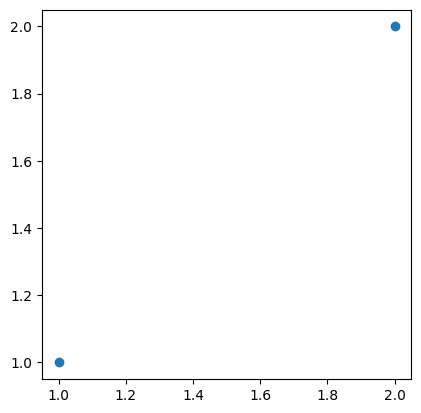

In [4]:
gdf.plot()

Es posible también crear un *GeoDataFrame* a partir de un *DataFrame*.

In [5]:
import pandas as pd


df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})
df

,City,Country,Latitude,Longitude
0,Buenos Aires,Argentina,-34.58,-58.66
1,Brasilia,Brazil,-15.78,-47.91
2,Santiago,Chile,-33.45,-70.66
3,Bogota,Colombia,4.60,-74.08
4,Caracas,Venezuela,10.48,-66.86


In [6]:
df['Coordinates']  = list(zip(df['Longitude'], df.Latitude))

df

,City,Country,Latitude,Longitude,Coordinates
0,Buenos Aires,Argentina,-34.58,-58.66,"(-58.66, -34.58)"
1,Brasilia,Brazil,-15.78,-47.91,"(-47.91, -15.78)"
2,Santiago,Chile,-33.45,-70.66,"(-70.66, -33.45)"
3,Bogota,Colombia,4.60,-74.08,"(-74.08, 4.6)"
4,Caracas,Venezuela,10.48,-66.86,"(-66.86, 10.48)"


In [7]:
df['Coordinates'] = df['Coordinates'].apply(Point)

df

,City,Country,Latitude,Longitude,Coordinates
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66 -34.58)
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91 -15.78)
2,Santiago,Chile,-33.45,-70.66,POINT (-70.66 -33.45)
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08 4.6)
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86 10.48)


In [8]:
gdf = gpd.GeoDataFrame(df, geometry='Coordinates')

gdf

,City,Country,Latitude,Longitude,Coordinates
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66000 -34.58000)
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91000 -15.78000)
2,Santiago,Chile,-33.45,-70.66,POINT (-70.66000 -33.45000)
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08000 4.60000)
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86000 10.48000)


Sin embargo en ambos ejemplos aunque tenemos coordenadas y podemos incluso generar un mapa con los puntos, si consultamos el sistema de coordenadas de referencia (*crs*) vamos a obtener que no hemos asignado el sistema.

In [9]:
print(gdf.crs)

None


Vamos a ver un ejemplo donde asignemos el *crs*. Los puntos pueden almacenarse en una tabla no geográfica, simplemente usando una columna para cada coordenada. Los datos se almacenan como una tabla de valores separados por comas (*.csv*). En este caso utilizamos geopandas `points_from_xy()` para transformar Longitud y Latitud en una lista de objetos `shapely.Point` y configurarlos como la geometría al crear el GeoDataFrame. Lo que nos interesa son las columnas de latitud y longitud del conjunto de datos.

In [10]:
import pandas as pd

df = pd.read_csv("https://geographicdata.science/book/_downloads/7fb86b605af15b3c9cbd9bfcbead23e9/tokyo_clean.csv")

type(df)

pandas.core.frame.DataFrame

In [11]:
df.head()

,user_id,longitude,latitude,date_taken,photo/video_page_url,x,y
0,10727420@N00,139.700499,35.674000,2010-04-09 17:26:25.0,http://www.flickr.com/photos/10727420@N00/4545...,1.555139e+07,4.255856e+06
1,8819274@N04,139.766521,35.709095,2007-02-10 16:08:40.0,http://www.flickr.com/photos/8819274@N04/26503...,1.555874e+07,4.260667e+06
2,62068690@N00,139.765632,35.694482,2008-12-21 15:45:31.0,http://www.flickr.com/photos/62068690@N00/3125...,1.555864e+07,4.258664e+06
3,49503094041@N01,139.784391,35.548589,2011-11-11 05:48:54.0,http://www.flickr.com/photos/49503094041@N01/6...,1.556073e+07,4.238684e+06
4,40443199@N00,139.768753,35.671521,2006-04-06 16:42:49.0,http://www.flickr.com/photos/40443199@N00/2482...,1.555899e+07,4.255517e+06


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               10000 non-null  object 
 1   longitude             10000 non-null  float64
 2   latitude              10000 non-null  float64
 3   date_taken            10000 non-null  object 
 4   photo/video_page_url  10000 non-null  object 
 5   x                     10000 non-null  float64
 6   y                     10000 non-null  float64
dtypes: float64(4), object(3)
memory usage: 547.0+ KB


In [13]:
geo = gpd.points_from_xy(x=df["longitude"],y=df["latitude"], crs="EPSG:4326")

In [14]:
gdf = gpd.GeoDataFrame(df, geometry=geo)

In [15]:
print(gdf.crs)

EPSG:4326


Para crear *GeoDataFrames* para otros objetos como lineas o poligonos es un poco mas complejo el proceso, por lo cual generalmente se importan desde formatos espaciales como *shp* o *gpkg*. Sin embargo veamos un sensillo ejemplo.

C:\Users\edier\AppData\Local\Temp\ipykernel_3348\1164090328.py:7: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  gdf['geometry'] = None


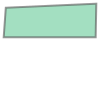

In [17]:
from shapely.geometry import Polygon

# Crear un GeoDataFrame vacío de geopandas
gdf = gpd.GeoDataFrame()

# Crear una nueva columna llamada 'geometry' en el GeoDataFrame
gdf['geometry'] = None

# Coordenadas de la Plaza del Senado de Helsinki en Grados Decimales
coordenadas = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]

# Crear un polígono de Shapely a partir de la lista de tuplas de coordenadas
poly = Polygon(coordenadas)

# Veamos lo que tenemos
poly

In [18]:
# Insertar el polígono en la columna 'geometry' en el índice 0
gdf.loc[0, 'geometry'] = poly

# Veamos lo que tenemos ahora
gdf

,geometry
0,"POLYGON ((24.95090 60.16916, 24.95349 60.16916..."


In [19]:
# Agregar una nueva columna e insertar datos
gdf.loc[0, 'Location'] = 'Senaatintori'

# Revisemos los datos
gdf

,geometry,Location
0,"POLYGON ((24.95090 60.16916, 24.95349 60.16916...",Senaatintori


In [20]:
print(gdf.crs)

None


In [25]:
gdf.crs = "EPSG:4326"

gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

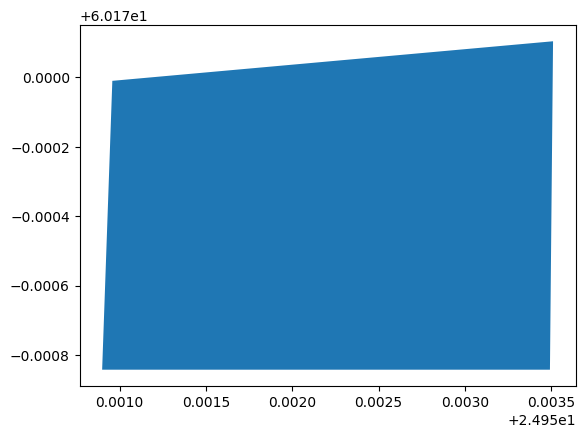

In [26]:
gdf.plot()

### Superficies (raster)
Las **Superficies** registran mediciones empíricas de **campos**. Los campos son una representación continua del espacio. En principio, hay un conjunto infinito de ubicaciones para las cuales un campo tiene un valor diferente. En la práctica, los campos se miden en un conjunto discreto de ubicaciones. Este objetivo de continuidad en el espacio (y potencialmente en el tiempo) es importante porque se vincula directamente con la forma en que se estructuran los datos. En la práctica, los campos se registran y almacenan en cuadrículas uniformes o matrices cuyas dimensiones están estrechamente relacionadas con la extensión geográfica del área que representan. Las matrices son estructuras bidimensionales, al menos. A diferencia de las tablas geográficas, las matrices de superficies utilizan tanto filas como columnas para significar la ubicación, y los valores de las celdas almacenan información sobre esa ubicación. Una superficie para un fenómeno dado (por ejemplo, la contaminación del aire) se representará como una matriz en la que cada fila estará vinculada a diferentes latitudes y cada columna representará longitudes. Si queremos representar más de un fenómeno (por ejemplo, contaminación del aire y elevación) o el mismo fenómeno en diferentes puntos del tiempo, necesitaremos diferentes matrices, posiblemente conectadas. Estas matrices multidimensionales a veces se denominan **cubos de datos**.

Los siguientes son probablemente los formatos mas conocidos para información de superficies, y que se denominan archivos tipo raster.

* .img (imagine) --> ERDAS
* GeoTiff (.tif)
* ASCCI (.asc)
* .netCDF

<center><img src="https://pvsmt99345.i.lithium.com/t5/image/serverpage/image-id/49571iD5C49038B1B61684/image-size/medium?v=1.0&px=400" width="500"></center>

<center><img src="https://desktop.arcgis.com/en/arcmap/10.3/manage-data/raster-and-images/GUID-412D5EE2-475A-4AD0-B3BD-2C4DEB1D667E-web.gif" width="800"></center>

Un **cubo de datos** es una matriz de datos multidimensional. En el dominio de los sensores remotos, un cubo de datos sirve imágenes satelitales como una matriz multidimensional, generalmente con dos dimensiones espaciales, una dimensión temporal y un número arbitrario de atributos como bandas o índices. La georreferenciación de las imágenes satelitales garantiza que la ubicación del píxel se mantenga coherente entre las diferentes capas del cubo de datos. El objetivo de un cubo de datos es ofrecer a los usuarios datos listos para el análisis, reduciendo así la carga de preprocesamiento y preparación de datos.

<center><img src="https://desktop.arcgis.com/en/arcmap/10.3/tools/space-time-pattern-mining-toolbox/GUID-0FEECE1A-6B54-44B4-AE49-05E7EA849A8B-web.png" width="500"></center>

Para explorar cómo Python representa las superficies, utilizaremos un extracto de la ciudad brasileña de São Paulo de un [conjunto de datos de población global](../data/ghsl/build_ghsl_extract). Este conjunto de datos registra recuentos de población en celdas de las mismas dimensiones que cubren uniformemente la superficie de la Tierra. Nuestro extracto está disponible como un archivo GeoTIF, una variación del formato de imagen TIF que incluye información geográfica. Podemos usar el método `open_rasterio()` del paquete `xarray` para leer el archivo GeoTIF:


In [28]:
import xarray
import rioxarray
pop = xarray.open_dataset("https://geographicdata.science/book/_downloads/5263090bd0bdbd7d1635505ff7d36d04/ghsl_sao_paulo.tif", engine='rasterio')

In [29]:
type(pop)

xarray.core.dataset.Dataset

xarray tiene diferentes tipos de formatos. Para transformar el dataset a un dataArray se utiliza:

In [44]:
dr = pop.to_dataarray()
type(dr)

xarray.core.dataarray.DataArray

In [42]:
dr.shape

(1, 1, 416, 468)

`xarray` es un paquete para trabajar con arreglos etiquetados multidimensionales.

In [40]:
dr.coords

Coordinates:
  * band         (band) int32 4B 1
  * x            (x) float64 4kB -4.482e+06 -4.482e+06 ... -4.365e+06 -4.365e+06
  * y            (y) float64 3kB -2.822e+06 -2.822e+06 ... -2.926e+06 -2.926e+06
    spatial_ref  int32 4B ...
  * variable     (variable) object 8B 'band_data'

Curiosamente, nuestra superficie tiene *tres* dimensiones: `x`, `y` y `band`. Las dos primeras rastrean la latitud y la longitud que cubre cada celda en nuestra cuadrícula de población. La tercera tiene un solo valor (1) y, en este contexto, no es muy útil. Pero es fácil imaginar contextos en los que una tercera dimensión sería útil. Por ejemplo, una imagen óptica en color puede tener tres bandas: rojo, azul y verde. Sensores más potentes pueden captar bandas adicionales, como el infrarrojo cercano (NIR) o incluso bandas de radio. O una superficie medida a lo largo del tiempo, como los geocubos, tendrá bandas para cada punto en el tiempo en el que se mide el campo. Una superficie geográfica tendrá, por lo tanto, dos dimensiones que registran la ubicación de las celdas (`x` y `y`), y al menos una `band` que registra otras dimensiones relacionadas con nuestros datos.

Un objeto `xarray.DataArray` contiene información adicional sobre los valores almacenados bajo el atributo `attrs`:


In [46]:
pop.sel(band=1)

<xarray.Dataset> Size: 786kB
Dimensions:      (x: 468, y: 416)
Coordinates:
    band         int32 4B 1
  * x            (x) float64 4kB -4.482e+06 -4.482e+06 ... -4.365e+06 -4.365e+06
  * y            (y) float64 3kB -2.822e+06 -2.822e+06 ... -2.926e+06 -2.926e+06
    spatial_ref  int32 4B ...
Data variables:
    band_data    (y, x) float32 779kB nan nan nan nan nan ... nan nan nan nan

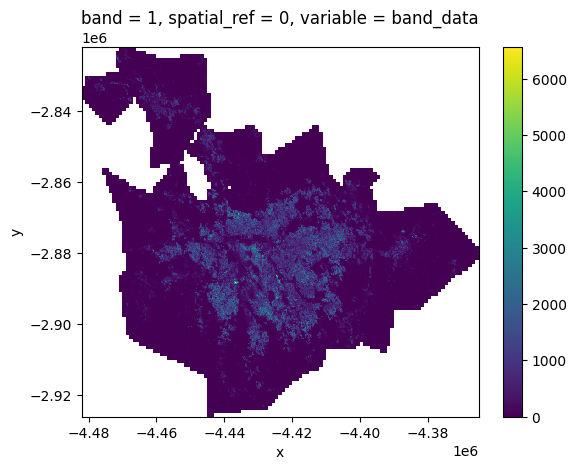

In [48]:
dr.sel(band=1).plot();